## Breast Cancer Prediction and Detection
### via Machine Learning and Deep Learning  

### David Kinney - DSC680 - Spring 2021 - Professor Catherine Williams
**********************************************************************

In [1]:
# Import packages
import pandas as pd
from pycaret.classification import *

## Breast Cancer Prediction - Machine Learning

In [2]:
# Read the Breast Cancer Wisconsin (Diagnostic) dataset
df = pd.read_csv('./data/data.csv')
df.shape

(569, 33)

### Exploratory Data Analysis

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.drop(['Unnamed: 32'], axis=1, inplace=True)

***********************************************
### Machine Learning Model Selection, Training and Tuning  

#### Initialize PyCaret

In [6]:
clf1 = setup(df, target = 'diagnosis')

,Description,Value
0,session_id,5104
1,Target,diagnosis
2,Target Type,Binary
3,Label Encoded,"B: 0, M: 1"
4,Original Data,"(569, 32)"
5,Missing Values,False
6,Numeric Features,31
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


#### Compare Baseline

In [7]:
%%time
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9624,0.9883,0.9500,0.9571,0.9521,0.9213,0.9231,0.1190
lda,Linear Discriminant Analysis,0.9599,0.9917,0.9058,0.9929,0.9457,0.9143,0.9185,0.0040
lightgbm,Light Gradient Boosting Machine,0.9599,0.9891,0.9438,0.9569,0.9480,0.9155,0.9183,0.3720
qda,Quadratic Discriminant Analysis,0.9574,0.9846,0.9433,0.9535,0.9474,0.9117,0.9130,0.0040
et,Extra Trees Classifier,0.9549,0.9920,0.9438,0.9440,0.9429,0.9057,0.9069,0.0650
catboost,CatBoost Classifier,0.9549,0.9911,0.9375,0.9508,0.9425,0.9054,0.9076,3.4790
ridge,Ridge Classifier,0.9525,0.0000,0.9000,0.9790,0.9360,0.8986,0.9025,0.0040
rf,Random Forest Classifier,0.9498,0.9913,0.9375,0.9405,0.9368,0.8953,0.8982,0.0880
gbc,Gradient Boosting Classifier,0.9474,0.9885,0.9250,0.9446,0.9319,0.8892,0.8927,0.0530
ada,Ada Boost Classifier,0.9448,0.9805,0.9188,0.9448,0.9278,0.8835,0.8877,0.0260


Wall time: 52.5 s


**Create best model from baseline results**

In [8]:
%%time
model = create_model('xgboost', gpu_id=1)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9250,0.9922,0.9375,0.8824,0.9091,0.8454,0.8465
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9500,0.9896,0.8750,1.0000,0.9333,0.8936,0.8987
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9500,0.9974,1.0000,0.8889,0.9412,0.8980,0.9027
5,0.9000,0.9661,0.8125,0.9286,0.8667,0.7872,0.7917
6,0.9250,0.9375,0.8750,0.9333,0.9032,0.8421,0.8433
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9744,1.0000,1.0000,0.9375,0.9677,0.9465,0.9479
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Wall time: 10.5 s


**Tune hyperparameters**

In [9]:
%%time
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9250,0.9922,1.0000,0.8421,0.9143,0.8485,0.8584
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9750,0.9948,0.9375,1.0000,0.9677,0.9474,0.9487
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9500,0.9922,1.0000,0.8889,0.9412,0.8980,0.9027
5,0.9000,0.9870,0.8750,0.8750,0.8750,0.7917,0.7917
6,0.9250,0.9531,0.8750,0.9333,0.9032,0.8421,0.8433
7,0.9500,1.0000,1.0000,0.8889,0.9412,0.8980,0.9027
8,0.9744,1.0000,1.0000,0.9375,0.9677,0.9465,0.9479
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Wall time: 21.7 s


#### Plot Results

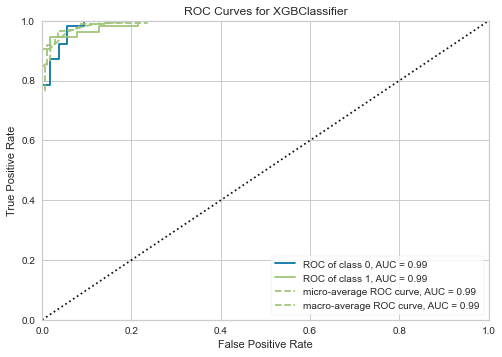

In [10]:
plot_model(model)

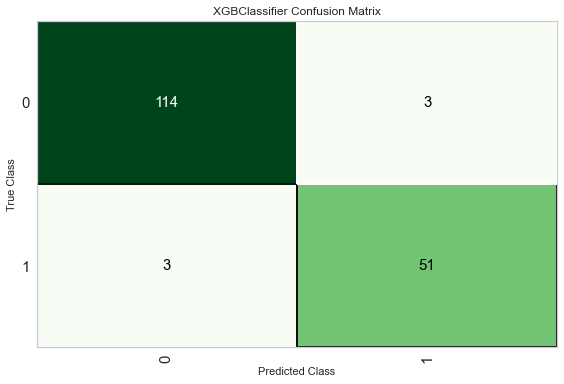

In [11]:
plot_model(model, plot = 'confusion_matrix')

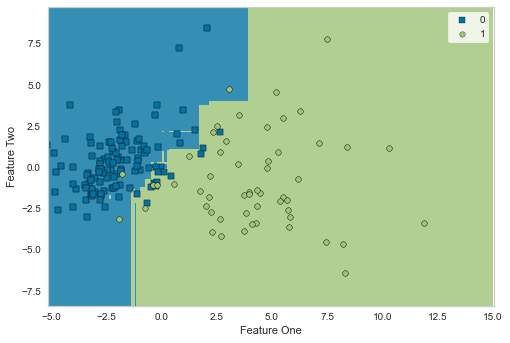

In [12]:
plot_model(model, plot = 'boundary')

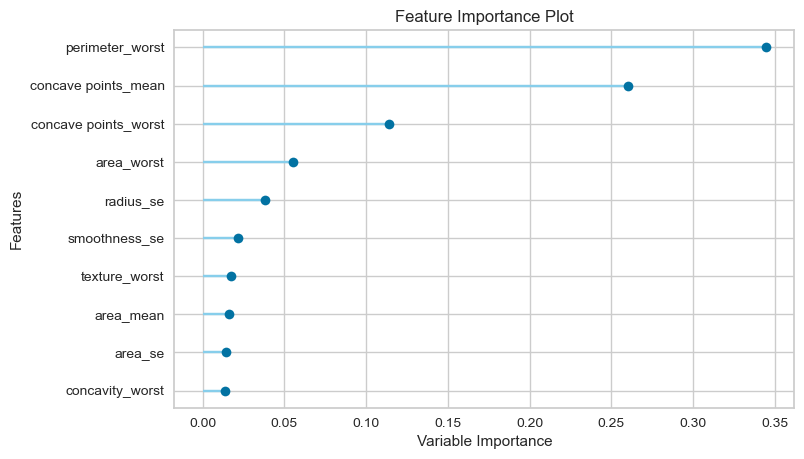

In [13]:
plot_model(model, plot = 'feature')

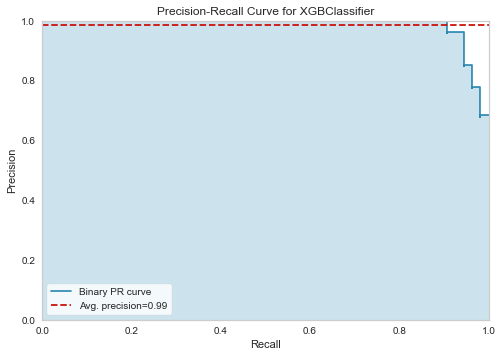

In [14]:
plot_model(model, plot = 'pr')

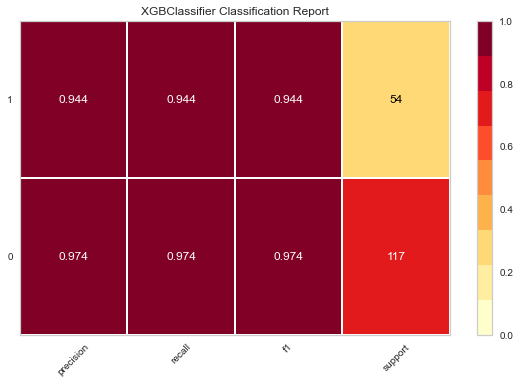

In [15]:
plot_model(model, plot = 'class_report')

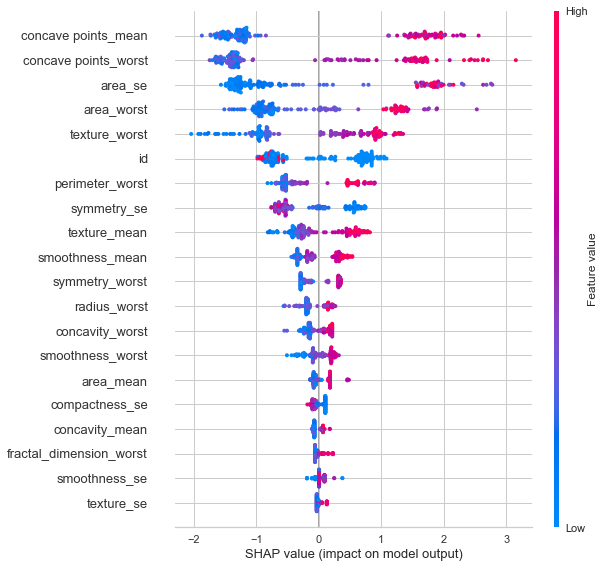

In [16]:
interpret_model(model)

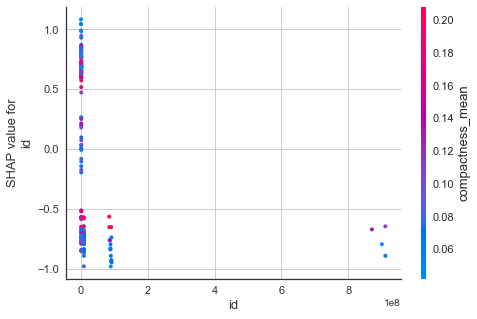

In [17]:
interpret_model(model, plot = 'correlation')

### Model Prediction

In [18]:
pred_holdouts = predict_model(model)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9649,0.9916,0.9444,0.9444,0.9444,0.9188,0.9188


,id,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,Label,Score
0,915276.0,13.140000,64.120003,272.500000,0.12550,0.22040,0.11880,0.07038,0.2057,0.09575,...,328.100006,0.2006,0.3663,0.2913,0.10750,0.2848,0.13640,B,B,0.9975
1,8611555.0,24.910000,171.500000,1878.000000,0.10630,0.26650,0.33390,0.18450,0.1829,0.06782,...,2562.000000,0.1573,0.6076,0.6476,0.28670,0.2355,0.10510,M,M,0.9997
2,911320512.0,18.219999,84.279999,537.299988,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,...,687.599976,0.1282,0.1965,0.1876,0.10450,0.2235,0.06925,B,B,0.9998
3,894326.0,18.870001,118.699997,1027.000000,0.09746,0.11170,0.11300,0.07950,0.1807,0.05664,...,1485.000000,0.1434,0.2763,0.3853,0.17760,0.2812,0.08198,M,M,0.9998
4,91903904.0,16.330000,87.760002,575.500000,0.09277,0.07255,0.01752,0.01880,0.1631,0.06155,...,773.400024,0.1264,0.1564,0.1206,0.08704,0.2806,0.07782,B,B,0.9996


************************************
## Breast Cancer Detection - Deep Learning 
### with fastai

In [ ]:
# Import packages
from os import listdir

import pandas as pd
import numpy as np

from fastai.callback.fp16 import *
from fastai.vision.all import *
from fastai import *
from fastai.metrics import error_rate

### Exploratory Data Analysis

In [ ]:
path = "./data/images/IDC_regular_ps50_idx5"
files = get_image_files(path)
len(files)

**Load training data**

In [ ]:
pattern= r'([^/_]+).png$'
dls = ImageDataLoaders.from_path_re(path, files, pattern, item_tfms=Resize(50),
                                    bs=64, size=50, valid_pct=0.3, seed = 61)

In [ ]:
# Class 0 = benign, class 1 = malignant
dls.show_batch()

### Modeling 

I've been learning the [fastai](https://docs.fast.ai/) deep learning library, which also leverages `PyTorch`. The documentation is (IMHO) not well organized, but that is more than made up for with the online courses and the accompanying book. `fastai` streamlines much of the neural network modeling details, allowing me to simply supply model names such as `ResNet18` to the `cnn_learner` method. In addition, many of these models are pre-trained through *transfer learning*, requiring the model to only need to learn the weights of the last layer of the network.  

With transfer learning, we begin with an existing (trained) neural network used for image recognition and then tweak it a bit to train a model for a particular use case. Training a reasonable neural network would mean needing approximately 300,000 image samples, and to achieve really good performance, we’re going to need at least a million images. For this use case, there are approximately 222,000 images in the training set. I am leveraging the `cnn_learner` function for loading a pre-trained ResNet18 network that was trained on around a million images from the ImageNet database.

**Approach**  

* Run 4 different training scenarios with a `ResNet18` model
* Take the best method, and train increasingly larger ResNets
* Evaluate results for best model

In [ ]:
# fastai has a pretty cool feature that forces half-precision floating point
# precision training, effectively reducing GPU memory consumption: to_fp16
learn = cnn_learner(dls, models.resnet34, metrics=[accuracy]).to_fp16()

**As a baseline, I will run two different variations of the `fine-tune` method, which takes a pre-trained model and uses one epoch to fit just those parts necessary to fit my dataset.**

In [ ]:
%%time
# Run a simple fine-tune for 5 epochs
learn.fine_tune(5)

In [ ]:
learn.save('BCPD_Simple5')

In [ ]:
learn.load('BCPD_Simple5')

In [ ]:
learn.recorder.plot_loss()

**Accuracy peaks at 3 epochs, so we only need to train that far. 89% accuracy is good, but I'd really like to see it break 90. I am going to retrain the model on only 3 epochs and then unfreeze all the weights and train the whole model again...**

In [ ]:
%%time
# Run a simple fine-tune for 5 epochs
learn.fine_tune(3)

In [ ]:
%%time
# Hypermaramter tuning
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1,slice(1e-7,1e-5))

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
len(dls.valid_ds)

In [ ]:
5159+18464

In [ ]:
# Calculate sensitivity and specificity
upp, low = interp.confusion_matrix()
tn, fp = upp[0], upp[1]
fn, tp = low[0], low[1]

# Sensitivity = True Positive/(True Positive + False Negative)
sensitivity = tp/(tp + fn)

# Specificity = True Negative/(False Positive + True Negative)
# aka Type II error
specificity = tn/(fp + tn)

# Positive Predictive Value aka Type I error
ppv = tp/(tp+fp)

# Negative Predictive Value
npv = tn/(tn+fn)

# Accuracy: sensitivity x prevalence + specificity * (1 - prevalence)
val = dls.valid_ds.cat


# There are 23,623 class 1 images in the valid set (which has a total of 83,257 images 
# and can be checked by using len(dls.valid_ds)).
prevalence = 23623/83257

print("Sensitivity: {}".format(sensitivity))
print("Specificity: {}".format(specificity))
print
print("PPV: {}".format(ppv))
print("NPV: {}".format(npv))

#### Side notes on Results Evaluation

*(Note: this entire section was copied whole from [the fastai website](https://docs.fast.ai/tutorial.medical_imaging.html))* 

Medical models are predominantly high impact so it is important to know how good a model is at detecting a certain condition.

`Accuracy` can be defined as the number of correctly predicted data points out of all the data points. However in this context we can define accuracy as the probability that the model is correct and the patient has the condition PLUS the probability that the model is correct and the patient *does not* have the condition.

**Calculating Accuracy**

The accuracy of this model as mentioned before was 56% but how was this calculated? We can consider accuracy as:

**accuracy = sensitivity x prevalence + specificity * (1 - prevalence)**

Where **prevalence** is a statistical concept referring to the number of cases of a disease that are present in a particular population at a given time. The prevalence in this case is how many patients in the valid dataset have the condition compared to the total number.

There are some other key terms that need to be used when evaluating medical models:

**False Positive & False Negative**

* **False Positive** is an error in which a test result improperly indicates presence of a condition, such as a disease (the result is positive), when in reality it is not present
* **False Negative** is an error in which a test result improperly indicates no presence of a condition (the result is negative), when in reality it is present  

**Sensitivity & Specificity**

* **Sensitivity or True Positive Rate** is where the model classifies a patient has the disease given the patient actually does have the disease. Sensitivity quantifies the avoidance of false negatives  

Example: A new test was tested on 10,000 patients, if the new test has a sensitivity of 90% the test will correctly detect 9,000 (True Positive) patients but will miss 1000 (False Negative) patients that have the condition but were tested as not having the condition  

* **Specificity or True Negative Rate** is where the model classifies a patient as not having the disease given the patient actually does not have the disease. Specificity quantifies the avoidance of false positives  

[Understanding and using sensitivity, specificity and predictive values](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2636062/) is a great paper if you are interested in learning more about understanding sensitivity, specificity and predictive values.

**PPV and NPV**

Most medical testing is evaluated via PPV (Positive Predictive Value) or NPV (Negative Predictive Value).

**PPV** - if the model predicts a patient has a condition what is the probability that the patient actually has the condition

**NPV** - if the model predicts a patient does not have a condition what is the probability that the patient actually does not have the condition

The ideal value of the PPV, with a perfect test, is 1 (100%), and the worst possible value would be zero

The ideal value of the NPV, with a perfect test, is 1 (100%), and the worst possible value would be zero